In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from test import load_attr, show_latent, load_model
attr_dir = 'Data/celeba'
tmp = load_attr(attr_dir)

version = 1
model_dir = f'logs/CelebA/VanillaVAE/version_{version}'
model = load_model(model_dir)

c:\Users\flama\anaconda3\envs\bdl\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


attribute file loaded
model loaded


In [3]:
tmp.columns

Index(['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes',
       'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair',
       'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin',
       'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones',
       'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair',
       'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick',
       'Wearing_Necklace', 'Wearing_Necktie', 'Young'],
      dtype='object')

In [4]:
sampled = tmp.sample(200, random_state=152)
file_name = list(sampled.index)


In [5]:
from test import show_latent
show_latent(file_name, model)

torch.Size([200, 3, 64, 64])


tensor([[ 1.5757,  1.7531,  0.5376,  ..., -0.5116,  1.3915,  1.8310],
        [ 1.6194,  0.7338,  0.6338,  ...,  0.4628,  0.8087,  1.4433],
        [ 1.0038, -1.0314, -0.0058,  ..., -0.3191,  0.9309, -1.2762],
        ...,
        [ 1.2984, -1.5882,  0.5405,  ..., -0.9692,  0.6804, -0.7620],
        [ 0.3345,  0.0302, -1.3043,  ..., -0.5886,  0.0154, -0.3156],
        [ 1.6382, -0.4145, -1.5267,  ..., -0.6698, -0.5331,  1.6057]],
       grad_fn=<AddmmBackward0>)

In [6]:
a = show_latent(file_name, model)

torch.Size([200, 3, 64, 64])


In [7]:
a[0]

tensor([ 1.5757,  1.7531,  0.5376,  0.1152,  2.3520,  1.5629, -0.0079,  0.5112,
         0.4629,  0.1100, -1.2984,  1.9471,  0.4448, -0.5116,  1.3915,  1.8310],
       grad_fn=<SelectBackward0>)

In [11]:
123

123

In [8]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

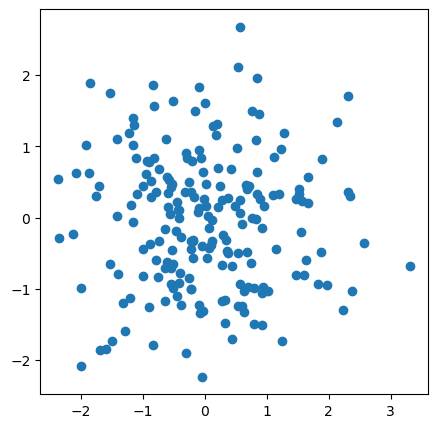

In [9]:
def visualize_latent(latent: list, attr: pd.DataFrame):
    '''
    given a list of latent vectors and the attribute file, 
    visualize the latent vectors with respect to attributes

    Parameters
        latent: list of latent vectors
        attr: attribute file

    Returns
        None
    '''
    # generate dummy data
    latent = np.random.randn(200, 128)
     
    # visualize the latent vectors with respect to attributes
    # draw scatter plots
    c = 
    plt.figure(figsize=(5, 5))
    plt.scatter(latent[:, 0], latent[:, 1], c=)
    plt.show()

    pass

visualize_latent([], sampled)


In [10]:
# get unique values of each attribute
unique_values = {}
for col in sampled.columns:
    unique_values[col] = sampled[col].unique()
unique_values

{'5_o_Clock_Shadow': array([-1,  1], dtype=int64),
 'Arched_Eyebrows': array([-1,  1], dtype=int64),
 'Attractive': array([ 1, -1], dtype=int64),
 'Bags_Under_Eyes': array([-1,  1], dtype=int64),
 'Bald': array([-1,  1], dtype=int64),
 'Bangs': array([ 1, -1], dtype=int64),
 'Big_Lips': array([-1,  1], dtype=int64),
 'Big_Nose': array([-1,  1], dtype=int64),
 'Black_Hair': array([ 1, -1], dtype=int64),
 'Blond_Hair': array([-1,  1], dtype=int64),
 'Blurry': array([-1,  1], dtype=int64),
 'Brown_Hair': array([-1,  1], dtype=int64),
 'Bushy_Eyebrows': array([-1,  1], dtype=int64),
 'Chubby': array([-1,  1], dtype=int64),
 'Double_Chin': array([-1,  1], dtype=int64),
 'Eyeglasses': array([-1,  1], dtype=int64),
 'Goatee': array([-1,  1], dtype=int64),
 'Gray_Hair': array([-1,  1], dtype=int64),
 'Heavy_Makeup': array([ 1, -1], dtype=int64),
 'High_Cheekbones': array([-1,  1], dtype=int64),
 'Male': array([-1,  1], dtype=int64),
 'Mouth_Slightly_Open': array([-1,  1], dtype=int64),
 'Musta